# Effects of user characteristics on bike trip duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of users that could be used to predict the bike trip duration. The main focus was on the user age, type (subscriber,customer) and gender (M , F, other).

## Dataset Overview

The data consisted of trip duration of approximately 174,952 bike trip. The attributes included the three characteristics of the users , as well as additional data such as bike id , station id, and others. 8460 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

df = pd.read_csv('E:/Udacity DataAnalysis track/projects/201902-fordgobike-tripdata.csv')

In [3]:
# Let's drop the rows with NaN values
df.dropna(axis=0,inplace=True)
df.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year          False
member_gender              False
bike_share_for_all_trip    False
dtype: bool

## Distribution of trip duration

it seems the distribution of the trip duration is a long-tailed one (right skewed) , and large number of trips lasted for about 300 --> 1000 sec. 
When plotted on a log-scale, the duration distribution looks unimodal, with a peak between 200 and 1000. we notice also the minimum trip duration is around 100 sec.



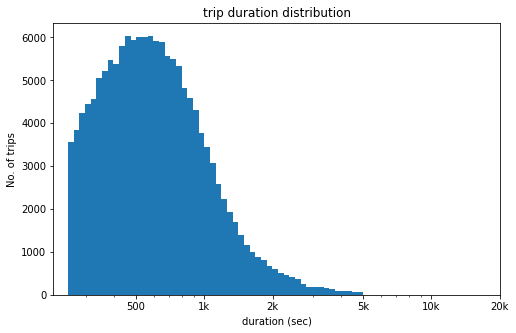

In [4]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(5000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration (sec)')
plt.ylabel("No. of trips")
plt.title("trip duration distribution")
plt.show()

 ## distribution of the members year of birth 
 
 the distribution is left skewed and unimodal (centered around 1985)

-note if we calculated the age with respect to the date of collecting the data we will have to subtract the year of birth from 2019 to get the age which will make the distribution right tailed 

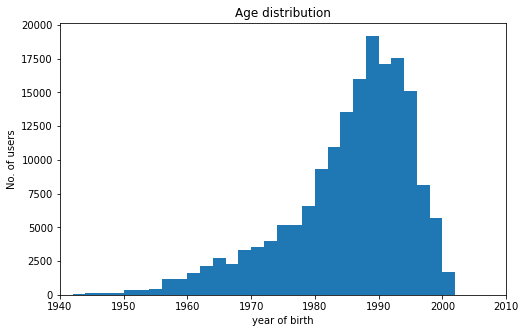

In [5]:
binsize = 2
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year',color=sb.color_palette()[0],bins=bins)
plt.xlim(1940,2010)
plt.ylabel("No. of users")
plt.title("Age distribution")
plt.xlabel("year of birth")
plt.show()

## duration vs. age

This plot suggests that most trip durations is for users whose age range from 20 to 30 which means younger users tend to have trips with higher duration  (note the graph is clipped as data may be limited) .

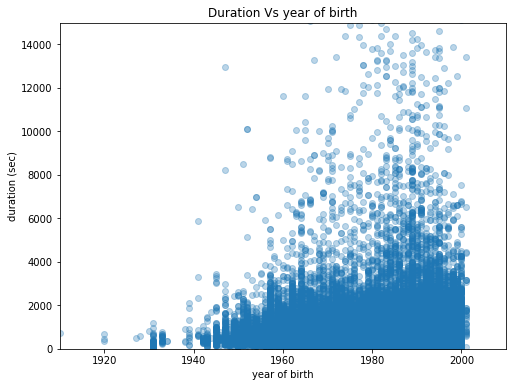

In [6]:
# scatter plot of duration_sec vs. age

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha = 0.3)
plt.xlim([1910, 2010])
plt.xlabel('year of birth')
plt.ylabel('duration (sec)')
plt.ylim(0,15000)

plt.title("Duration Vs year of birth")
plt.show()

## Duration vs gender and type

although the number of customers are a way lower than the subscribers but they tend to have higher duration on average .
In terms of the gender relation i see no interesting results except females have higher duration trips on average than males.

note that those graphs do not give us info about the size of the samples or population used.

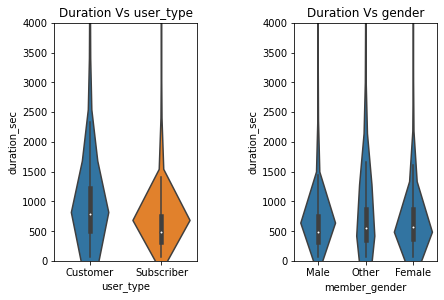

In [7]:
# plot the categorical variables against duration 



plt.subplot(1, 2, 1)
sb.violinplot(data=df,x="user_type",y="duration_sec")
plt.ylim(0,4000)

plt.title("Duration Vs user_type")


#plot 2:

plt.subplot(1, 2, 2)

sb.violinplot(data=df,x="member_gender",y="duration_sec",color=sb.color_palette()[0])
plt.ylim(0,4000)
plt.tight_layout(w_pad=5,h_pad=10,pad=0.1)

plt.title("Duration Vs gender")


plt.show()

Let's explore the the two categorical variables affect the relationship between duration and age.

In [8]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)


this is duration vs age by user type

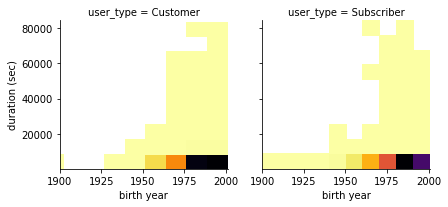

In [9]:
# create faceted heat maps on user_type variable
g = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 3, height= 3)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
g.set_xlabels('birth year')
g.set_ylabels('duration (sec)')

plt.show()

and this duration vs age by gender

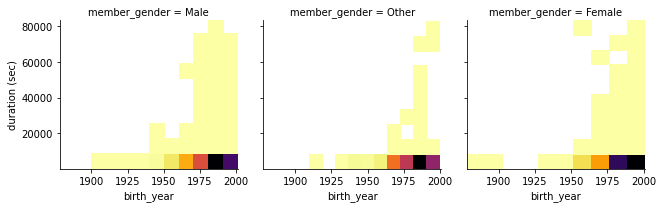

In [10]:
# create faceted heat maps on member_gender variable
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
g.set_xlabels('birth_year')
g.set_ylabels('duration (sec)')

plt.show()

## Conclusions:-

### 1- trip duration increases for younger users
### 2- males tend to have longer trips